<a href="https://colab.research.google.com/github/jessejhudson1989/Data-Science/blob/main/classification_of_images_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Goal: classify images into one of the 10 categories.
- Dataset: CIFAR-10
- Model identifies features (shapes, colors, textures)

**How the classification process work**
- *Input image*: each image is 32*32 pixel, with RGB color channels.
- *Convolutional Layers*: these layers use filters to slide across the image and detect local patters (shapes, edges, ...)
- *Pooling Layers*: reduce the spatial dimensions of the image => keep the most important features and discard less important ones.
- *Fully connected layer*: the image is flattened (converted from 2D structure to a 1D vector).
- *Classification (Softmax Output)*: outputs a vector of probabilities. The softmax activation function is used to convert the raw scores into probabilities.

**How the model makes predictions**
- *During the training*: the model learns which features are associated with each class.
- *After the training*: the model uses the learned filters and patterns to classify the image.
- *Output of the model*: is a set of probabilities for all 10 classes.
    - Horse: 0.85
    - Airplaine: 0.05
    - Dog: 0.03
    - Automobile: 0.02
    - ...


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3314 - loss: 1.7973 - val_accuracy: 0.5322 - val_loss: 1.2987
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.5677 - loss: 1.2174 - val_accuracy: 0.6107 - val_loss: 1.1017
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.6304 - loss: 1.0440 - val_accuracy: 0.6434 - val_loss: 1.0053
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.6672 - loss: 0.9445 - val_accuracy: 0.6619 - val_loss: 0.9586
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6960 - loss: 0.8735 - val_accuracy: 0.6753 - val_loss: 0.9293
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 54ms/step - accuracy: 0.7145 - loss: 0.8126 - val_accuracy: 0.6659 - val_loss: 0.9673
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 49ms/step - accuracy: 0.7328 - loss: 0.7620 - val_accuracy: 0.6913 - val_loss: 0.8907
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7491 

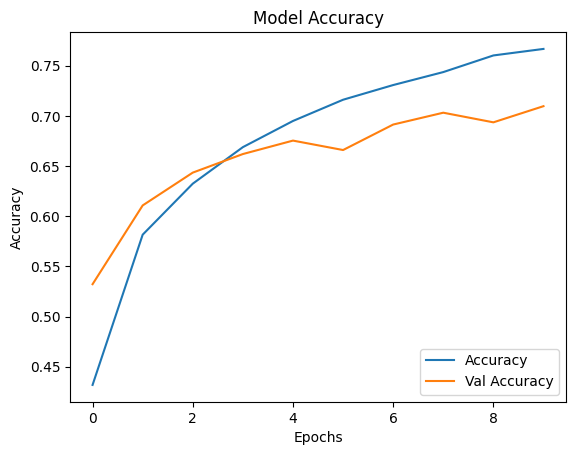

In [ ]:
#Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0 #[0, 255] => [0, 1]

model = models.Sequential([
    #first convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    #second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    #flatten layer
    layers.Flatten(),

    #fully connected layer
    layers.Dense(64, activation='relu'),

    #output layer
    layers.Dense(10, activation='softmax') #10 output classes for CIFAR-10
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


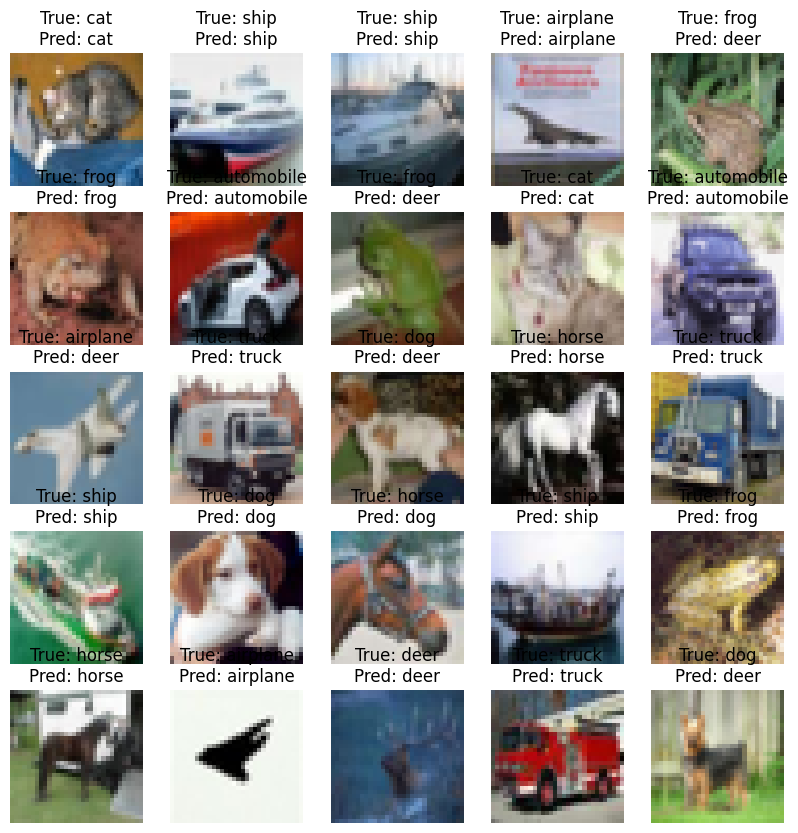

In [ ]:
import numpy as np

def plot_images(images, labels, predictions, class_names):
  plt.figure(figsize=(10, 10))
  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    true_label = class_names[labels[i][0]]
    predicted_label = class_names[predictions[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
  plt.show()

predictions = model.predict(test_images)

predicted_class_indices = np.argmax(predictions, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plot_images(test_images, test_labels, predicted_class_indices, class_names)
